<h1> Shor's 9 Qubit Error correction algorithm

In [58]:
from qiskit import __version__
assert __version__ >= '2.0.0', 'Qiskit version is too low!'
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.quantum_info import random_clifford

from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

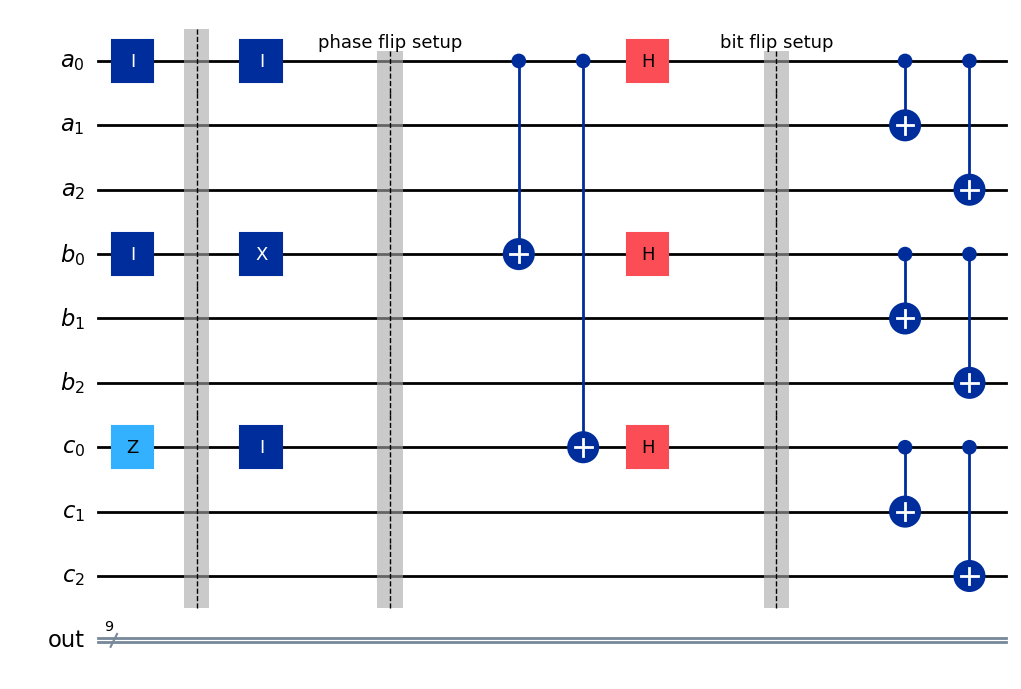

In [55]:
def shor_9_qb(phase_err=None, flip_err=None) -> QuantumCircuit:
    """Shor's algorithm for 9 qubits."""
    
    reg_1 = QuantumRegister(3, 'a')
    reg_2 = QuantumRegister(3, 'b')
    reg_3 = QuantumRegister(3, 'c')

    cl_reg = ClassicalRegister(9, 'out')

    qc = QuantumCircuit(reg_1, reg_2, reg_3, cl_reg)

    # set phase errors
    if phase_err == 0:
        qc.z(reg_1[0])
        qc.id(reg_2[0])
        qc.id(reg_3[0])
        
    elif phase_err == 1:
        qc.z(reg_2[0])
        qc.id(reg_1[0])
        qc.id(reg_3[0])

    elif phase_err == 2:
        qc.z(reg_3[0])
        qc.id(reg_1[0])
        qc.id(reg_2[0])

    qc.barrier()
    # set bit flip errors
    
    if flip_err == 0:
        qc.x(reg_1[0])
        qc.id(reg_2[0])
        qc.id(reg_3[0])
        
    elif flip_err == 1:
        qc.x(reg_2[0])
        qc.id(reg_1[0])
        qc.id(reg_3[0])

    elif flip_err == 2:
        qc.x(reg_3[0])
        qc.id(reg_1[0])
        qc.id(reg_2[0])

    
    # set up the initial state for phase flip detection
    qc.barrier(label='phase flip setup')

    qc.cx(reg_1[0], reg_2[0])
    qc.cx(reg_1[0], reg_3[0])

    for i in [reg_1, reg_2, reg_3]:
        qc.h(i[0])

    qc.barrier(label='bit flip setup')
    # st uo for bit flip detection

    for i in [reg_1, reg_2, reg_3]:
        qc.cx(i[0], i[1])
        qc.cx(i[0], i[2])

    # qc.barrier(label='measurement')
    # qc.measure(reg_1, cl_reg[0:3])
    # qc.measure(reg_2, cl_reg[3:6])
    # qc.measure(reg_3, cl_reg[6:9])

    return qc

shor_9_qb(phase_err=2,flip_err=1).draw('mpl', fold=-1)

In [ ]:
stabilizers = ['ZZI', 'IZZ']

qcs = [shor_9_qb(phase_err=phase_err, flip_err=flip_err) for phase_err in range(3) for flip_err in range(3)]



[{'111111111': 12429, '000111111': 12456, '111000000': 12628, '000000000': 12504, '111111000': 12373, '000111000': 12487, '111000111': 12572, '000000111': 12551}, {'111000111': 12551, '000111000': 12597, '000000111': 12548, '000111111': 12379, '111111111': 12460, '111111000': 12538, '000000000': 12493, '111000000': 12434}, {'111000000': 12486, '000000000': 12544, '111000111': 12537, '000000111': 12527, '000111000': 12475, '111111000': 12472, '111111111': 12589, '000111111': 12370}, {'000000111': 12311, '111000111': 12443, '000111000': 12573, '111000000': 12731, '000000000': 12391, '000111111': 12400, '111111111': 12611, '111111000': 12540}, {'111111111': 12466, '111111000': 12518, '111000000': 12587, '000000000': 12339, '111000111': 12531, '000000111': 12595, '000111000': 12616, '000111111': 12348}, {'111111000': 12438, '111111111': 12563, '111000111': 12433, '000000111': 12344, '000111000': 12400, '000111111': 12396, '000000000': 12768, '111000000': 12658}, {'111111000': 12389, '00011

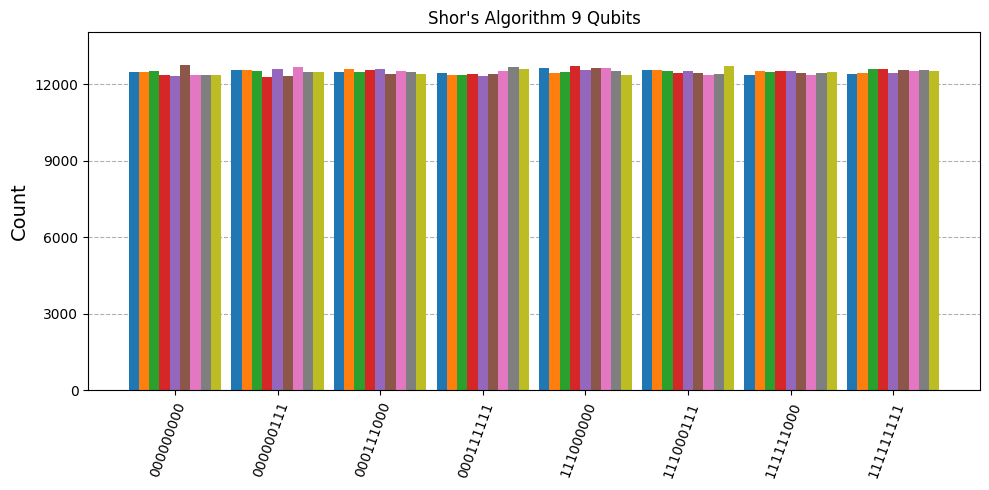

In [53]:
qcs = [shor_9_qb(i,j) for i in range(3) for j in range(3)]

qc_transpiled = transpile(qcs, optimization_level=0)
backend = AerSimulator(method='statevector')
job = backend.run(qc_transpiled, shots=100000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts, title='Shor\'s Algorithm 9 Qubits', bar_labels=False, figsize=(10, 5))